In [3]:
from util_v3 import *
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
# data_dir = "C:\\Users\\DavidJIA\\Desktop\\IC RMFE\\Term 3\\Applied Macro Trading Strategy\\CourseWork\\datasets\\"
data_dir = './'
# Load and process data
aqms_data = load_aqms_data(data_dir + 'AQMS.xlsx')
bc_data = load_business_cycle_data(data_dir + 'Business Cycle.xls')


In [5]:
data_dir = './'
# Load and process data
aqms_data = load_aqms_data(data_dir + 'AQMS.xlsx')
bc_data = load_business_cycle_data(data_dir + 'Business Cycle.xls')
# Preprocess asset data
ar, ir = preprocess_asset_data_daily(aqms_data)

# Preprocess macro factors
mf = preprocess_macro_factors(bc_data, ar, ir)
mf = create_us_centric_trade_factors(mf.copy())
mf = standardize_column_names(mf)
ar = standardize_column_names(ar)
ar = transform_currency_returns(ar)
mf = transform_currency_returns(mf)
print(ar.columns)
print(mf.columns)
# standardize_column_names(ar)

Index(['Equity_US', 'Equity_UK', 'Equity_JP', 'Equity_HK', 'Equity_CA',
       'Equity_EU', 'Equity_CH', 'Equity_AU', 'Equity_NZ', 'FXReturn_UK',
       'FXReturn_JP', 'FXReturn_EU', 'FXReturn_HK', 'FXReturn_CH',
       'FXReturn_CA', 'FXReturn_AU', 'FXReturn_NZ', 'IR Future_SFRA Comdty',
       'IR Future_SFR1YZ2 Comdty', 'IR Future_SFR1YZ3 Comdty',
       'IR Future_SFR1YZ4 Comdty', 'IR Future_SFR1YZ5 Comdty',
       'IR Future_SFR1YZ6 Comdty', 'IR Future_SFR2YZ2 Comdty',
       'BondYield2Y_US', 'BondYield2Y_UK', 'BondYield2Y_JP', 'BondYield2Y_HK',
       'BondYield2Y_CA', 'BondYield2Y_CH', 'BondYield2Y_AU', 'BondYield2Y_NZ',
       'BondYield2Y_EU', 'BondYield10Y_US', 'BondYield10Y_UK',
       'BondYield10Y_JP', 'BondYield10Y_HK', 'BondYield10Y_CA',
       'BondYield10Y_CH', 'BondYield10Y_AU', 'BondYield10Y_NZ'],
      dtype='object')
Index(['ExcessReturn_US', 'ExcessReturn_UK', 'ExcessReturn_JP',
       'ExcessReturn_HK', 'ExcessReturn_CA', 'ExcessReturn_EU',
       'ExcessReturn_

In [6]:
ar = ar[ar.index >= '1985-01-01']
ir = ir[ir.index >= '1985-01-01']

In [5]:
ar.columns

Index(['Equity_US', 'Equity_UK', 'Equity_JP', 'Equity_HK', 'Equity_CA',
       'Equity_EU', 'Equity_CH', 'Equity_AU', 'Equity_NZ', 'FXReturn_UK',
       'FXReturn_JP', 'FXReturn_EU', 'FXReturn_HK', 'FXReturn_CH',
       'FXReturn_CA', 'FXReturn_AU', 'FXReturn_NZ', 'IR Future_SFRA Comdty',
       'IR Future_SFR1YZ2 Comdty', 'IR Future_SFR1YZ3 Comdty',
       'IR Future_SFR1YZ4 Comdty', 'IR Future_SFR1YZ5 Comdty',
       'IR Future_SFR1YZ6 Comdty', 'IR Future_SFR2YZ2 Comdty',
       'BondYield2Y_US', 'BondYield2Y_UK', 'BondYield2Y_JP', 'BondYield2Y_HK',
       'BondYield2Y_CA', 'BondYield2Y_CH', 'BondYield2Y_AU', 'BondYield2Y_NZ',
       'BondYield2Y_EU', 'BondYield10Y_US', 'BondYield10Y_UK',
       'BondYield10Y_JP', 'BondYield10Y_HK', 'BondYield10Y_CA',
       'BondYield10Y_CH', 'BondYield10Y_AU', 'BondYield10Y_NZ'],
      dtype='object')

In [6]:
ar.columns

Index(['Equity_US', 'Equity_UK', 'Equity_JP', 'Equity_HK', 'Equity_CA',
       'Equity_EU', 'Equity_CH', 'Equity_AU', 'Equity_NZ', 'FXReturn_UK',
       'FXReturn_JP', 'FXReturn_EU', 'FXReturn_HK', 'FXReturn_CH',
       'FXReturn_CA', 'FXReturn_AU', 'FXReturn_NZ', 'IR Future_SFRA Comdty',
       'IR Future_SFR1YZ2 Comdty', 'IR Future_SFR1YZ3 Comdty',
       'IR Future_SFR1YZ4 Comdty', 'IR Future_SFR1YZ5 Comdty',
       'IR Future_SFR1YZ6 Comdty', 'IR Future_SFR2YZ2 Comdty',
       'BondYield2Y_US', 'BondYield2Y_UK', 'BondYield2Y_JP', 'BondYield2Y_HK',
       'BondYield2Y_CA', 'BondYield2Y_CH', 'BondYield2Y_AU', 'BondYield2Y_NZ',
       'BondYield2Y_EU', 'BondYield10Y_US', 'BondYield10Y_UK',
       'BondYield10Y_JP', 'BondYield10Y_HK', 'BondYield10Y_CA',
       'BondYield10Y_CH', 'BondYield10Y_AU', 'BondYield10Y_NZ'],
      dtype='object')

In [7]:
ar.columns

Index(['Equity_US', 'Equity_UK', 'Equity_JP', 'Equity_HK', 'Equity_CA',
       'Equity_EU', 'Equity_CH', 'Equity_AU', 'Equity_NZ', 'FXReturn_UK',
       'FXReturn_JP', 'FXReturn_EU', 'FXReturn_HK', 'FXReturn_CH',
       'FXReturn_CA', 'FXReturn_AU', 'FXReturn_NZ', 'IR Future_SFRA Comdty',
       'IR Future_SFR1YZ2 Comdty', 'IR Future_SFR1YZ3 Comdty',
       'IR Future_SFR1YZ4 Comdty', 'IR Future_SFR1YZ5 Comdty',
       'IR Future_SFR1YZ6 Comdty', 'IR Future_SFR2YZ2 Comdty',
       'BondYield2Y_US', 'BondYield2Y_UK', 'BondYield2Y_JP', 'BondYield2Y_HK',
       'BondYield2Y_CA', 'BondYield2Y_CH', 'BondYield2Y_AU', 'BondYield2Y_NZ',
       'BondYield2Y_EU', 'BondYield10Y_US', 'BondYield10Y_UK',
       'BondYield10Y_JP', 'BondYield10Y_HK', 'BondYield10Y_CA',
       'BondYield10Y_CH', 'BondYield10Y_AU', 'BondYield10Y_NZ'],
      dtype='object')

In [7]:
# Apply transformation on ar
ar = transform_currency_returns(ar.copy())

# Apply transformation on mf
mf = create_us_centric_trade_factors(mf.copy())
ar = ar.ffill().bfill()
mf = mf.ffill().bfill()
# Verify
print("Trade factor columns created:")
print([col for col in mf.columns if col.startswith('TradeFactor_')])
print("\nSample trade factors:")
print(mf.filter(like='TradeFactor_'))

KeyError: 'Currency_JP'

In [9]:
ar.columns

Index(['Equity_US', 'Equity_UK', 'Equity_JP', 'Equity_HK', 'Equity_CA',
       'Equity_EU', 'Equity_CH', 'Equity_AU', 'Equity_NZ', 'FXReturn_UK',
       'FXReturn_JP', 'FXReturn_EU', 'FXReturn_HK', 'FXReturn_CH',
       'FXReturn_CA', 'FXReturn_AU', 'FXReturn_NZ', 'IR Future_SFRA Comdty',
       'IR Future_SFR1YZ2 Comdty', 'IR Future_SFR1YZ3 Comdty',
       'IR Future_SFR1YZ4 Comdty', 'IR Future_SFR1YZ5 Comdty',
       'IR Future_SFR1YZ6 Comdty', 'IR Future_SFR2YZ2 Comdty',
       'BondYield2Y_US', 'BondYield2Y_UK', 'BondYield2Y_JP', 'BondYield2Y_HK',
       'BondYield2Y_CA', 'BondYield2Y_CH', 'BondYield2Y_AU', 'BondYield2Y_NZ',
       'BondYield2Y_EU', 'BondYield10Y_US', 'BondYield10Y_UK',
       'BondYield10Y_JP', 'BondYield10Y_HK', 'BondYield10Y_CA',
       'BondYield10Y_CH', 'BondYield10Y_AU', 'BondYield10Y_NZ'],
      dtype='object')

In [10]:
mf

,ExcessReturn_US,ExcessReturn_UK,ExcessReturn_JP,ExcessReturn_HK,ExcessReturn_CA,ExcessReturn_EU,ExcessReturn_AU,ExcessReturn_NZ,ExcessReturn_CH,GDP_AU,...,BondYield2Y_EU,TradeFactor_GBP Curncy,TradeFactor_JPY Curncy,TradeFactor_EUR Curncy,TradeFactor_HKD Curncy,TradeFactor_CHF Curncy,TradeFactor_CAD Curncy,TradeFactor_AUD Curncy,TradeFactor_NZD Curncy,TradeFactor_US
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,-14.000000,-17.000000,0.000000,-13.000000,-7.000000,-3.000000,-17.500000,-4.500000,0.750000,0.029,...,2.042,0.000000,0.000000,0.000000,-0.018347,0.000000,0.000000,0.000000,0.000000,-0.002293
1980-01-02,-14.020196,-17.000000,0.000000,-12.988913,-7.003910,-3.000000,-17.500000,-4.500000,0.750000,0.029,...,2.042,0.010908,-0.007699,0.004509,-0.009653,-0.010972,-0.002225,0.002080,0.002035,-0.001377
1980-01-03,-14.005106,-17.000000,0.000000,-13.030445,-7.009241,-3.000000,-17.500000,-4.500000,0.750000,0.029,...,2.042,-0.001204,-0.000419,0.001848,-0.001866,-0.003487,0.003860,0.001264,0.003046,0.000380
1980-01-04,-13.987645,-17.000000,0.000227,-13.015335,-6.996753,-3.000000,-17.500000,-4.500000,0.750000,0.029,...,2.042,-0.001339,-0.014894,-0.003163,0.000831,0.002226,-0.001367,-0.000361,-0.002024,-0.002511
1980-01-07,-13.997278,-17.000000,-0.000044,-13.038476,-6.989461,-3.000000,-17.500000,-4.500000,0.750000,0.029,...,2.042,0.010952,-0.013842,0.002578,-0.005398,-0.003491,0.000599,0.003787,0.004057,-0.000095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-13,-4.490007,-4.250239,-0.021281,-5.768735,-2.745128,-2.395577,-4.095694,-3.491323,-0.254449,0.010,...,2.814,0.009335,-0.005658,0.008298,0.000757,-0.005440,-0.001360,0.015851,0.014005,0.004474
2025-05-14,-4.500000,-4.250000,0.029481,-5.750000,-2.750000,-2.400000,-4.100000,-3.500000,-0.250000,0.010,...,2.814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-05-15,-4.500000,-4.250000,0.000000,-5.750000,-2.750000,-2.400000,-4.100000,-3.500000,-0.250000,0.010,...,2.814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
ar.to_csv(data_dir + 'ar_processed.csv')
mf.to_csv(data_dir + 'mf_processed.csv')

In [18]:
mp_portfolio = construct_mp_portfolio(ar, mf)

KeyboardInterrupt: 

In [19]:
rs_portfolio = construct_rs_portfolio(ar, mf)

KeyboardInterrupt: 

<Axes: xlabel='Date'>

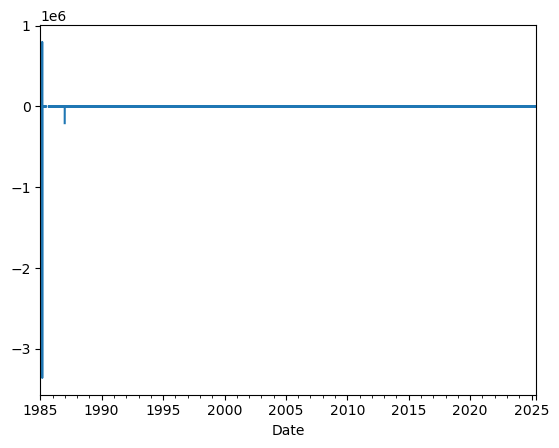

In [13]:
rs_portfolio['returns'].plot()

In [14]:
mf

,ExcessReturn_US,ExcessReturn_UK,ExcessReturn_JP,ExcessReturn_HK,ExcessReturn_CA,ExcessReturn_EU,ExcessReturn_AU,ExcessReturn_NZ,ExcessReturn_CH,GDP_AU,...,BondYield2Y_EU,TradeFactor_GBP Curncy,TradeFactor_JPY Curncy,TradeFactor_EUR Curncy,TradeFactor_HKD Curncy,TradeFactor_CHF Curncy,TradeFactor_CAD Curncy,TradeFactor_AUD Curncy,TradeFactor_NZD Curncy,TradeFactor_US
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-01,-14.000000,-17.000000,0.000000,-13.000000,-7.000000,-3.000000,-17.500000,-4.500000,0.750000,0.029,...,2.042,0.000000,0.000000,0.000000,-0.018347,0.000000,0.000000,0.000000,0.000000,-0.002293
1980-01-02,-14.020196,-17.000000,0.000000,-12.988913,-7.003910,-3.000000,-17.500000,-4.500000,0.750000,0.029,...,2.042,0.010908,-0.007699,0.004509,-0.009653,-0.010972,-0.002225,0.002080,0.002035,-0.001377
1980-01-03,-14.005106,-17.000000,0.000000,-13.030445,-7.009241,-3.000000,-17.500000,-4.500000,0.750000,0.029,...,2.042,-0.001204,-0.000419,0.001848,-0.001866,-0.003487,0.003860,0.001264,0.003046,0.000380
1980-01-04,-13.987645,-17.000000,0.000227,-13.015335,-6.996753,-3.000000,-17.500000,-4.500000,0.750000,0.029,...,2.042,-0.001339,-0.014894,-0.003163,0.000831,0.002226,-0.001367,-0.000361,-0.002024,-0.002511
1980-01-07,-13.997278,-17.000000,-0.000044,-13.038476,-6.989461,-3.000000,-17.500000,-4.500000,0.750000,0.029,...,2.042,0.010952,-0.013842,0.002578,-0.005398,-0.003491,0.000599,0.003787,0.004057,-0.000095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-13,-4.490007,-4.250239,-0.021281,-5.768735,-2.745128,-2.395577,-4.095694,-3.491323,-0.254449,0.010,...,2.814,0.009335,-0.005658,0.008298,0.000757,-0.005440,-0.001360,0.015851,0.014005,0.004474
2025-05-14,-4.500000,-4.250000,0.029481,-5.750000,-2.750000,-2.400000,-4.100000,-3.500000,-0.250000,0.010,...,2.814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2025-05-15,-4.500000,-4.250000,0.000000,-5.750000,-2.750000,-2.400000,-4.100000,-3.500000,-0.250000,0.010,...,2.814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
mf.columns

Index(['ExcessReturn_US', 'ExcessReturn_UK', 'ExcessReturn_JP',
       'ExcessReturn_HK', 'ExcessReturn_CA', 'ExcessReturn_EU',
       'ExcessReturn_AU', 'ExcessReturn_NZ', 'ExcessReturn_CH', 'GDP_AU',
       'GDP_CA', 'GDP_EU', 'GDP_HK', 'GDP_JP', 'GDP_NZ', 'GDP_CH', 'GDP_UK',
       'GDP_US', 'CPI_AU', 'CPI_CA', 'CPI_EU', 'CPI_HK', 'CPI_JP', 'CPI_NZ',
       'CPI_CH', 'CPI_UK', 'CPI_US', 'FXReturn_UK', 'FXReturn_JP',
       'FXReturn_EU', 'FXReturn_HK', 'FXReturn_CH', 'FXReturn_CA',
       'FXReturn_AU', 'FXReturn_NZ', 'BondYield2Y_US', 'BondYield2Y_UK',
       'BondYield2Y_JP', 'BondYield2Y_HK', 'BondYield2Y_CA', 'BondYield2Y_CH',
       'BondYield2Y_AU', 'BondYield2Y_NZ', 'BondYield2Y_EU',
       'TradeFactor_GBP Curncy', 'TradeFactor_JPY Curncy',
       'TradeFactor_EUR Curncy', 'TradeFactor_HKD Curncy',
       'TradeFactor_CHF Curncy', 'TradeFactor_CAD Curncy',
       'TradeFactor_AUD Curncy', 'TradeFactor_NZD Curncy', 'TradeFactor_US'],
      dtype='object')

In [17]:
it_portfolio = construct_it_portfolio(ar, mf);

['US', 'UK', 'JP', 'HK', 'CA', 'EU', 'CH', 'AU', 'NZ']


KeyError: "['UK', 'JP', 'HK', 'CA', 'EU', 'CH', 'AU', 'NZ'] not in index"

In [49]:
mf.columns

Index(['ExcessReturn_US', 'ExcessReturn_UK', 'ExcessReturn_JP',
       'ExcessReturn_HK', 'ExcessReturn_CA', 'ExcessReturn_EU',
       'ExcessReturn_AU', 'ExcessReturn_NZ', 'ExcessReturn_CH', 'GDP_AU',
       'GDP_CA', 'GDP_EU', 'GDP_HK', 'GDP_JP', 'GDP_NZ', 'GDP_CH', 'GDP_UK',
       'GDP_US', 'CPI_AU', 'CPI_CA', 'CPI_EU', 'CPI_HK', 'CPI_JP', 'CPI_NZ',
       'CPI_CH', 'CPI_UK', 'CPI_US', 'Currency_UK', 'Currency_JP',
       'Currency_EU', 'Currency_HK', 'Currency_CH', 'Currency_CA',
       'Currency_AU', 'Currency_NZ', 'BondYield2Y_US', 'BondYield2Y_UK',
       'BondYield2Y_JP', 'BondYield2Y_HK', 'BondYield2Y_CA', 'BondYield2Y_CH',
       'BondYield2Y_AU', 'BondYield2Y_NZ', 'BondYield2Y_EU',
       'TradeFactor_GBP Curncy', 'TradeFactor_JPY Curncy',
       'TradeFactor_EUR Curncy', 'TradeFactor_HKD Curncy',
       'TradeFactor_CHF Curncy', 'TradeFactor_CAD Curncy',
       'TradeFactor_AUD Curncy', 'TradeFactor_NZD Curncy', 'TradeFactor_US'],
      dtype='object')

In [22]:

# Preprocess asset data
ar, ir = preprocess_asset_data(aqms_data)

ar = ar[ar.index >= '1985-01-01']
ir = ir[ir.index >= '1985-01-01']
# Preprocess macro factors
mf = preprocess_macro_factors(bc_data, ar, ir)
mf = standardize_column_names(mf)
ar = standardize_column_names(ar)
# Construct the portfolio
bc_portfolio = construct_bc_portfolio(ar, mf);

<Axes: xlabel='Date'>

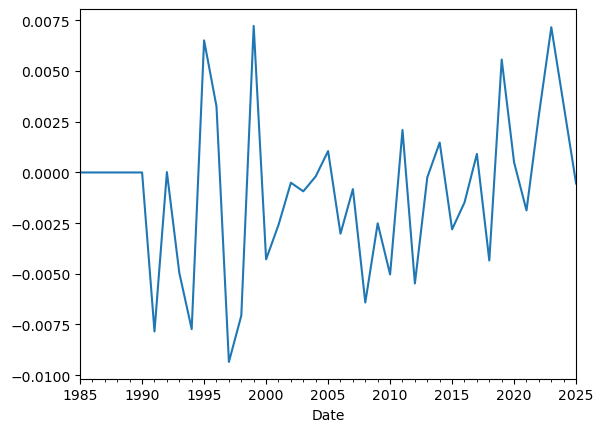

In [23]:
bc_portfolio['returns'].plot()

In [24]:
bc_portfolio['returns'] = bc_portfolio['returns'].resample('D').ffill()

<Axes: xlabel='Date'>

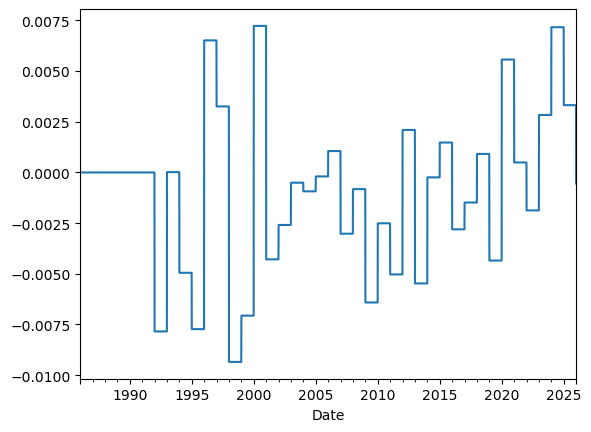

In [25]:
bc_portfolio['returns'].plot()

In [26]:
bc_portfolio['returns'] = bc_portfolio['returns'].reindex(rs_portfolio['returns'].index)


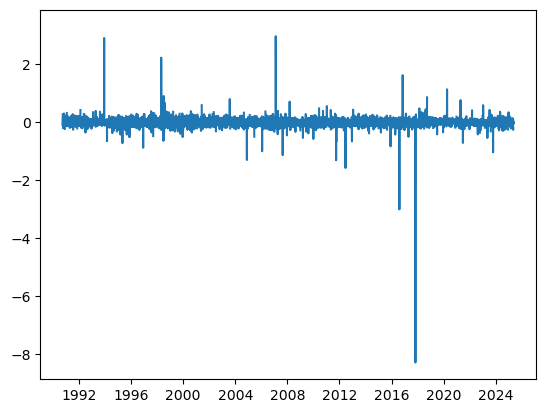

In [27]:
import matplotlib.pyplot as plt
plt.plot(mp_portfolio['returns'].iloc[1500:], label='Business Cycle Portfolio')

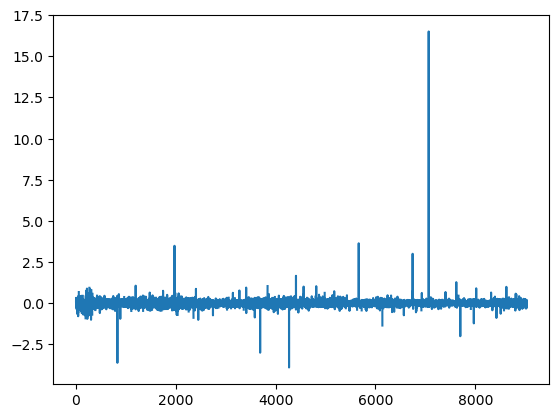

In [28]:
plt.plot(it_portfolio['returns'].values[1500:])

In [29]:
returns_data = [mp_portfolio['returns'].values, 
                rs_portfolio['returns'].values, 
                it_portfolio['returns'].values, 
                bc_portfolio['returns'].values]
returns_data = [np.nan_to_num(data, nan=0) for data in returns_data]


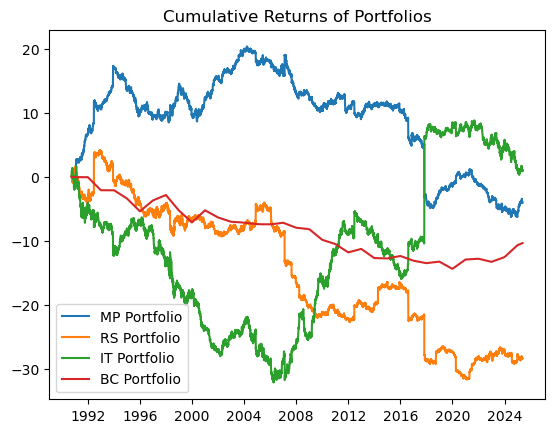

In [30]:
labels = ['MP Portfolio', 'RS Portfolio', 'IT Portfolio', 'BC Portfolio']
for i, data in enumerate(returns_data):
    data = np.where((data > 80) | (data < -80), 0, data)  # Replace extreme values with 0
    data = data[1500:]
    cum_returns = np.cumsum(data)
    # print(cum_returns)
    plt.plot(mp_portfolio['returns'].index[1500:], cum_returns, label= labels[i])
plt.title('Cumulative Returns of Portfolios')
plt.legend()

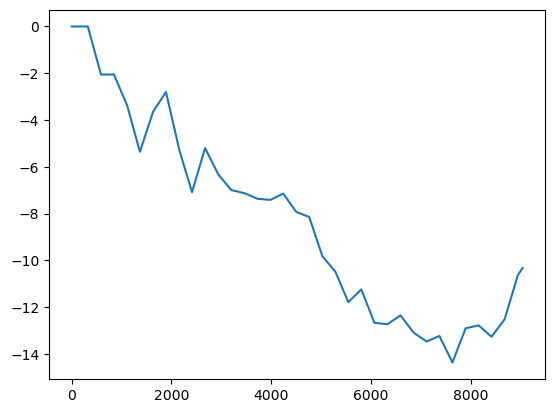

In [31]:
plt.plot(cum_returns)

In [32]:
# Align indices of portfolio returns
aligned_returns = [mp_portfolio['returns'], rs_portfolio['returns'], it_portfolio['returns'], bc_portfolio['returns']]
aligned_returns = [r.reindex(mp_portfolio['returns'].index).fillna(0) for r in aligned_returns]

# Perform the addition
total_returns = sum(r.values for r in aligned_returns)
total_returns = np.nan_to_num(total_returns, nan=0, posinf=0, neginf=0)
total_returns = np.where((total_returns > 80) | (total_returns < -80), 0, total_returns)
total_returns

array([0.        , 0.        , 0.        , ..., 0.00332067, 0.00332067,
       0.00332067])

In [33]:
nan_count = np.sum(np.isnan(total_returns))
print(f"Number of NaN values in total_returns: {nan_count}")
print(f"Max of total_returns: {np.nanmax(total_returns)}")
print(f"Min of total_returns: {np.nanmin(total_returns)}")

Number of NaN values in total_returns: 0
Max of total_returns: 32.9099280145011
Min of total_returns: -8.09793707074149


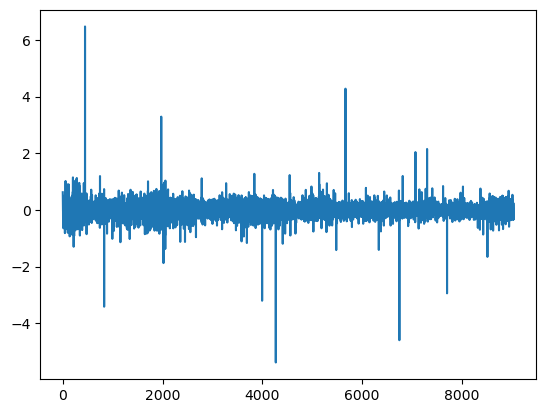

In [34]:
plt.plot(total_returns[1500:])

In [35]:
total_returns[0]

0.0

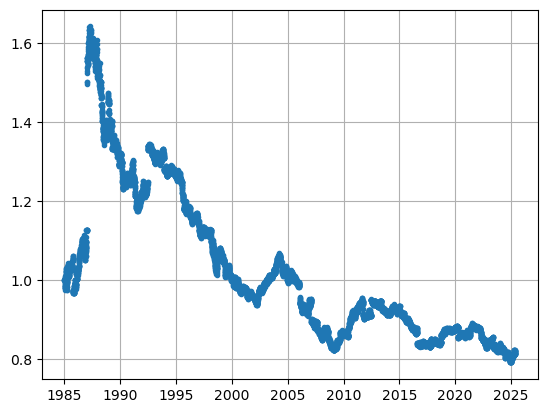

In [36]:
start = 0
cum_returns = np.cumprod(1 + total_returns[start:]/100)
dates = it_portfolio['returns'].index[start:]
plt.plot(dates, cum_returns, '.')
plt.grid()